# Relativistic Gravitational Collapse of a Cylindrical Shell of Dust by Nakao et al
##  Geoff Cope
##  Univeristy of Utah
##  December 31, 2021

Vacuum field equations not finished.

https://arxiv.org/abs/gr-qc/0610039

https://arxiv.org/abs/0905.3968

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,phi,z,dt,dr,dphi,dz = symbols( 't r phi z dt dr dphi dz' )

In [5]:
gamma = Function('gamma')(t,r)
gamma

In [6]:
psi = Function('psi')(t,r)
psi

In [8]:
beta = Function('beta')(t,r)
beta

In [9]:
variables = Matrix( [t,r,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [10]:
differentials = Matrix( [dt,dr,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [11]:
lineElement = expand( - exp(2*(gamma-psi))*(-dt**2 + dr**2 ) + r**2 * beta**2 * exp(-2*psi) * dphi**2 +exp(2*psi)*dz**2 )
lineElement

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅γ(t, r)  -2⋅ψ(t, r)                                                              ⎤
⎢ℯ         ⋅ℯ                       0                        0                 0     ⎥
⎢                                                                                    ⎥
⎢                          2⋅γ(t, r)  -2⋅ψ(t, r)                                     ⎥
⎢          0             -ℯ         ⋅ℯ                       0                 0     ⎥
⎢                                                                                    ⎥
⎢                                                  2  2        -2⋅ψ(t, r)            ⎥
⎢          0                        0             r ⋅β (t, r)⋅ℯ                0     ⎥
⎢                                                                                    ⎥
⎢                                                                           2⋅ψ(t, r)⎥
⎣          0                        0                        0             ℯ         ⎦

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡ 2⋅γ(t, r)  -2⋅ψ(t, r)                                                              ⎤
⎢ℯ         ⋅ℯ                       0                        0                 0     ⎥
⎢                                                                                    ⎥
⎢                          2⋅γ(t, r)  -2⋅ψ(t, r)                                     ⎥
⎢          0             -ℯ         ⋅ℯ                       0                 0     ⎥
⎢                                                                                    ⎥
⎢                                                  2  2        -2⋅ψ(t, r)            ⎥
⎢          0                        0             r ⋅β (t, r)⋅ℯ                0     ⎥
⎢                                                                                    ⎥
⎢                                                                           2⋅ψ(t, r)⎥
⎣          0                        0                        0             ℯ         ⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [17]:
metric = MetricTensor(m,syms)

In [18]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                           
⎢⎡⎛   2⋅γ(t, r)  -2⋅ψ(t, r) ∂                2⋅γ(t, r)  -2⋅ψ(t, r) ∂          ⎞  -2⋅γ(t, r) 
⎢⎢⎜2⋅ℯ         ⋅ℯ          ⋅──(γ(t, r)) - 2⋅ℯ         ⋅ℯ          ⋅──(ψ(t, r))⎟⋅ℯ          ⋅
⎢⎢⎝                         ∂t                                     ∂t         ⎠             
⎢⎢──────────────────────────────────────────────────────────────────────────────────────────
⎢⎢                                                 2                                        
⎢⎢                                                                                          
⎢⎢⎛   2⋅γ(t, r)  -2⋅ψ(t, r) ∂                2⋅γ(t, r)  -2⋅ψ(t, r) ∂          ⎞  -2⋅γ(t, r) 
⎢⎢⎜2⋅ℯ         ⋅ℯ          ⋅──(γ(t, r)) - 2⋅ℯ         ⋅ℯ          ⋅──(ψ(t, r))⎟⋅ℯ          ⋅
⎢⎢⎝                         ∂r                                     ∂r         ⎠             
⎢⎢────────────────────────────────────────────────────────────────────

In [19]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛                                                                                        
⎢  ⎜∂           ∂             ∂           ∂             ∂           ∂             ∂         
⎢r⋅⎜──(β(t, r))⋅──(γ(t, r)) - ──(β(t, r))⋅──(ψ(t, r)) + ──(β(t, r))⋅──(γ(t, r)) + ──(β(t, r)
⎢  ⎜∂r          ∂r            ∂r          ∂r            ∂t          ∂t            ∂t        
⎢  ⎝                                                                                        
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                      ⎛                                    
⎢                                                      ⎜∂           ∂ 

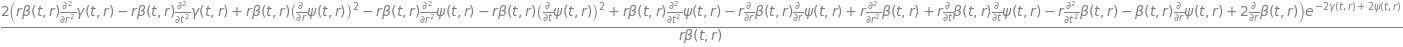

In [20]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [21]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛                                                                                        
⎢  ⎜∂           ∂             ∂           ∂             ∂           ∂             ∂         
⎢r⋅⎜──(β(t, r))⋅──(γ(t, r)) - ──(β(t, r))⋅──(ψ(t, r)) + ──(β(t, r))⋅──(γ(t, r)) + ──(β(t, r)
⎢  ⎜∂r          ∂r            ∂r          ∂r            ∂t          ∂t            ∂t        
⎢  ⎝                                                                                        
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [22]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [23]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [24]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                    2                      
⎢                                                                   ∂                       
⎢                                        ∂           ∂             ───(β(t, r))       ∂     
⎢               2                2   1.0⋅──(β(t, r))⋅──(γ(t, r))     2            1.0⋅──(β(t
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂r          ∂r            ∂r                 ∂t    
⎢- ⎜──(ψ(t, r))⎟  - ⎜──(ψ(t, r))⎟  + ─────────────────────────── - ──────────── + ──────────
⎢  ⎝∂r         ⎠    ⎝∂t         ⎠              β(t, r)               β(t, r)                
⎢                                                                                           
⎢                                                                                           
⎢  ⎛                                                       2          ⎞                     
⎢  ⎜∂           ∂             ∂           ∂               ∂           

In [25]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡  ⎛                                                                                        
⎢  ⎜∂           ∂             ∂           ∂             ∂           ∂             ∂         
⎢r⋅⎜──(β(t, r))⋅──(γ(t, r)) - ──(β(t, r))⋅──(ψ(t, r)) + ──(β(t, r))⋅──(γ(t, r)) + ──(β(t, r)
⎢  ⎜∂r          ∂r            ∂r          ∂r            ∂t          ∂t            ∂t        
⎢  ⎝                                                                                        
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                       ⎛                                   
⎢                                                       ⎜∂           ∂

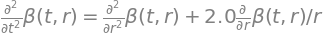

In [41]:
equation2pt12 = Eq( diff(beta,t,t), solve( simplify( einsteinSimplified[0,0] - einsteinSimplified[1,1] ).args[2], diff(beta,t,t) )[0] ) 
equation2pt12

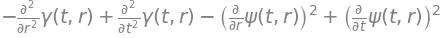

In [40]:
equation2pt13 = einsteinSimplified[2,2].args[3]
equation2pt13

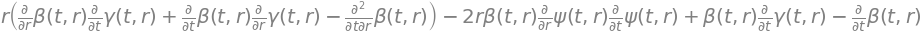

In [45]:
ricciSimplified[1,0].args[2]

In [47]:
vacuumFieldEquations = Matrix([equation2pt12,equation2pt13])
vacuumFieldEquations

⎡                                           ∂                   ⎤
⎢           2              2            2.0⋅──(β(t, r))         ⎥
⎢          ∂              ∂                 ∂r                  ⎥
⎢         ───(β(t, r)) = ───(β(t, r)) + ───────────────         ⎥
⎢           2              2                   r                ⎥
⎢         ∂t             ∂r                                     ⎥
⎢                                                               ⎥
⎢    2              2                         2                2⎥
⎢   ∂              ∂             ⎛∂          ⎞    ⎛∂          ⎞ ⎥
⎢- ───(γ(t, r)) + ───(γ(t, r)) - ⎜──(ψ(t, r))⎟  + ⎜──(ψ(t, r))⎟ ⎥
⎢    2              2            ⎝∂r         ⎠    ⎝∂t         ⎠ ⎥
⎣  ∂r             ∂t                                            ⎦